# __Social Media and Network Analytics__

## __EDA__

### Import and concat datasets:

In [ ]:
import pandas as pd

youtube_df = pd.read_csv('../datasets/raw/youtube_comments.csv')
reddit_df = None
combined_df = None

youtube_df.head(5)

,video_id,text,author,likes,date,time,year,met_gala_year
0,iWS3oVeyjL4,18:23 ate it upppp🔥🔥 the monocle was icing 🙌🏽,@HippiesHealingApothecary,0,2025-05-15,12:00:00,2025,2025
1,iWS3oVeyjL4,this video screams quality. your deep knowledg...,@lotsofinterests,0,2025-05-15,06:00:00,2025,2025
2,iWS3oVeyjL4,I usually never comment but Cardi B KILLED IT ...,@SeventhGate008,0,2025-05-15,03:00:00,2025,2025
3,iWS3oVeyjL4,Zendaya's look reminded me of James Van Der Ze...,@shortourt14,0,2025-05-15,01:00:00,2025,2025
4,iWS3oVeyjL4,30:07 I IMMEDIATELY thought the theme was the ...,@KindnessKillsNONDO,0,2025-05-14,17:00:00,2025,2025


### Data collected count relative to Met Gala year:

In [2]:
year_counts = youtube_df.groupby('met_gala_year').size().reset_index(name='count')

year_counts = year_counts.sort_values('met_gala_year')

print("YouTube Comments Count by Year:")
print("============================")
print(year_counts.to_string(index=False))
print("\n")

YouTube Comments Count by Year:
 met_gala_year  count
          2021  13639
          2022  13526
          2023   7560
          2024  16046
          2025  21305




## __Preprocessing__

### Process Text:

In [ ]:
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# Download necessary NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Function to process text and return tokens
def process_text(text):
    if not isinstance(text, str):
        return [], 0, 0
    
    # Initialize tokenizer and stemmer
    tokenizer = TweetTokenizer()
    stemmer = PorterStemmer()
    
    # Define punctuation list
    l_punct = list(string.punctuation)
    
    # Get standard stopwords and add custom ones
    stop_words = set(stopwords.words('english'))
    
    # Additional stopwords including YouTube-specific and general common words
    additional_stopwords = [
        'would', 'could', 'also', 'like', 'one', 'go', 'see', 'think', 'make',
        'get', 'take', 'look', 'know', 'want', 'say', 'said', 'even', 'still',
        'much', 'many', 'back', 'good', 'new', 'this', 'that', 'these', 'those',
        'has', 'had', 'was', 'were', 'been', 'being', 'have', 'any', 'some',
        'video', 'youtube', 'watch', 'subscribe', 'channel', 'comment',
        'thought', 'just', 'really', 'actually', 'time', 'people', 'great',
        'thing', 'going', 'looking', 'looks', 'looked', 'saw', 'seen', 'got',
        'getting', 'went', 'goes', 'via'
    ]
    
    # Combine all stopwords
    all_stop_words = list(stop_words) + l_punct + additional_stopwords
    
    # Convert to lowercase
    text_lower = text.lower()
    
    # Remove timestamps (like 18:23, 30:07)
    text_lower = re.sub(r'\d+:\d+', '', text_lower)
    
    # Remove URLs
    text_lower = re.sub(r'https?://\S+|www\.\S+', '', text_lower)
    
    # Filter out emoticons and keep only alphanumeric, space, and punctuation
    text_lower = ''.join(char for char in text_lower if char.isalnum() or char.isspace() or char in string.punctuation)
    
    # Tokenize text using TweetTokenizer
    tokens = tokenizer.tokenize(text_lower)
    
    # Store original length of text
    original_word_count = len(tokens)
    
    # Strip whitespaces
    tokens = [token.strip() for token in tokens]
    
    # Filter tokens: remove short words, stopwords, digits, etc.
    filtered_tokens = [token for token in tokens if 
                      (len(token) > 2 and
                      token not in all_stop_words and
                      not token.isdigit() and
                      token != "'" and token != "''" and
                      token != "..." and token != "…")]
    
    # Stem tokens
    stemmed_tokens = set()
    for token in filtered_tokens:
        stemmed_tokens.add(stemmer.stem(token))
    
    # Calculate dropped words
    final_word_count = len(stemmed_tokens)
    words_dropped = original_word_count - final_word_count
    
    return list(stemmed_tokens), words_dropped, original_word_count

Amount of words in text fields: 1298686
Amount of words dropped: 795329


### Parse dataframe text to process_text():

In [ ]:
# Set the number of most frequent terms to display
freq_num = 85

# Create term frequency counter
term_freq_counter = Counter()

# Process the text column in the DataFrame
total_words_dropped = 0
total_words_dataset = 0

# Process each comment text
for idx, row in youtube_df.iterrows():
    comment_text = row['text']
    if isinstance(comment_text, str):
        tokens, words_dropped, total_words = process_text(comment_text)
        # Join the tokens back into a string and store in the DataFrame
        youtube_df.at[idx, 'text'] = ' '.join(tokens)
        term_freq_counter.update(tokens)
        total_words_dropped += words_dropped
        total_words_dataset += total_words

print(f"Amount of words in text fields: {total_words_dataset}")
print(f"Amount of words dropped: {total_words_dropped}")

### Plot K-words:

1: dress: 6860
2: love: 5698
3: theme: 4801
4: met: 4048
5: gala: 3360
6: outfit: 2850
7: wear: 2807
8: fashion: 2709
9: kim: 2275
10: beauti: 2209
11: thank: 2178
12: best: 2126
13: american: 2117
14: year: 2059
15: way: 1980
16: lisa: 1937
17: billi: 1786
18: black: 1655
19: show: 1564
20: lol: 1477
21: refer: 1434
22: design: 1404
23: need: 1398
24: alway: 1352
25: amaz: 1316
26: made: 1280
27: well: 1276
28: wait: 1273
29: dont: 1257
30: agre: 1256
31: feel: 1247
32: give: 1227
33: jenni: 1165
34: part: 1164
35: stun: 1155
36: liter: 1136
37: someth: 1103
38: come: 1099
39: better: 1088
40: talk: 1082
41: live: 1062
42: first: 1039
43: person: 1023
44: luke: 1015
45: miss: 1003
46: didnt: 997
47: everyon: 996
48: fit: 992
49: girl: 990
50: emma: 987
51: never: 979
52: lot: 979
53: absolut: 953
54: icon: 950
55: kendal: 946
56: carpet: 939
57: watch: 939
58: ye: 930
59: wore: 927
60: gorgeou: 926
61: someon: 917
62: suit: 914
63: marilyn: 912
64: style: 896
65: event: 893
66: blake:

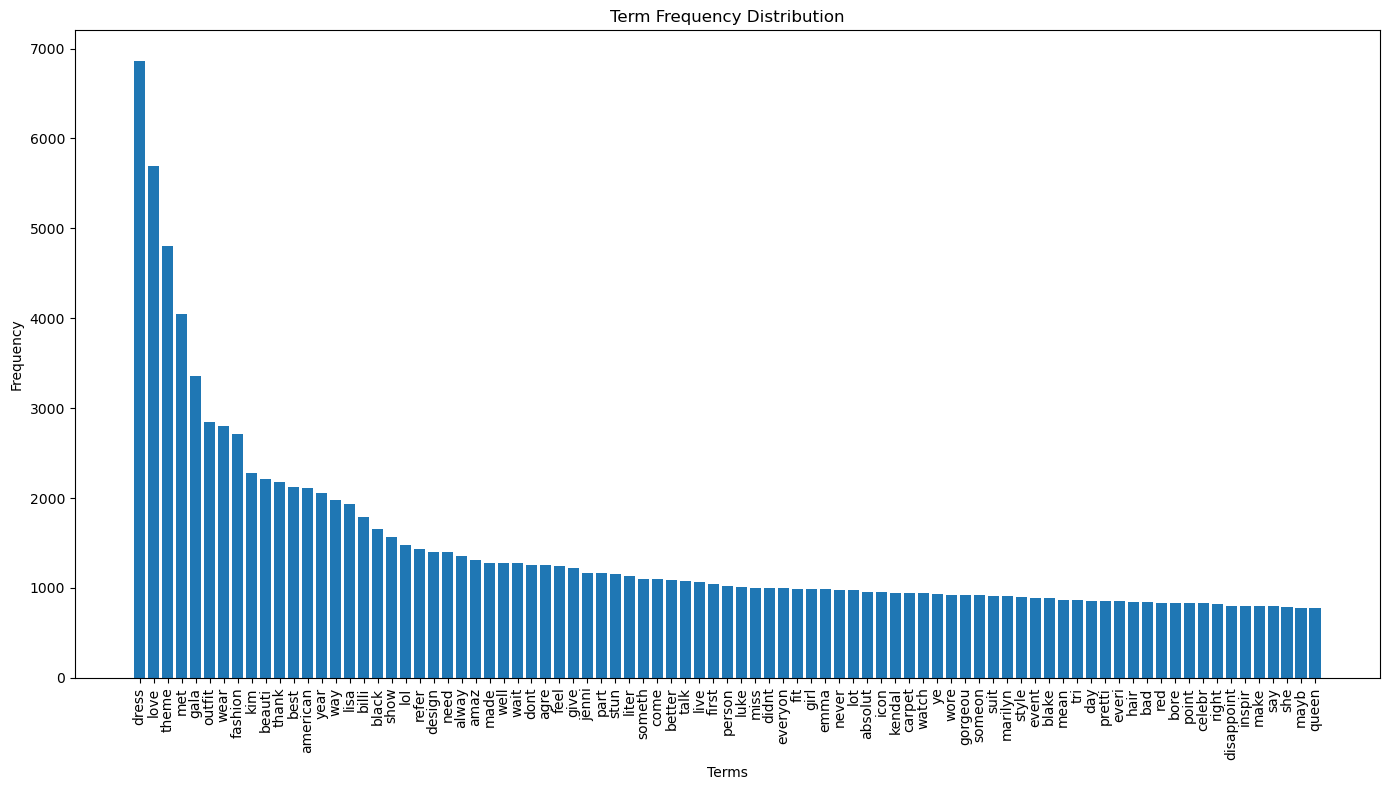

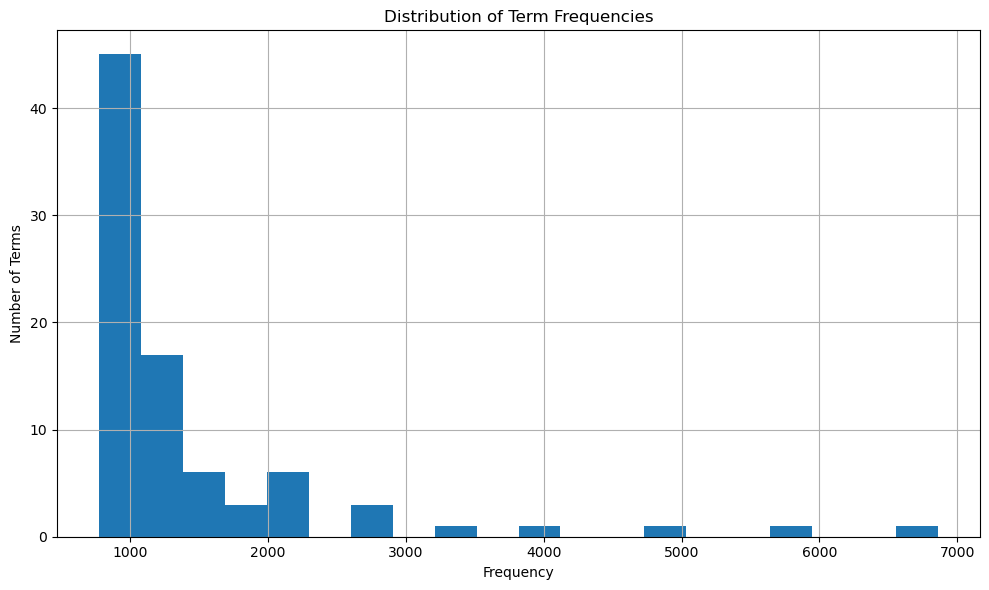

Processed comments saved to 'youtube_comments_processed.csv' with tokenized text


In [4]:
import matplotlib.pyplot as plt

# Print out most common terms
ranking = 1
for term, count in term_freq_counter.most_common(freq_num):
    print(f"{ranking}: {term}: {count}")
    ranking += 1

# Get the most common terms for visualization
most_common = term_freq_counter.most_common(freq_num)

# Create visualization if we have data
if most_common:
    # Create histogram of term frequencies
    terms, counts = zip(*most_common)
    
    # Create a bar chart
    plt.figure(figsize=(14, 8))
    plt.bar(range(len(terms)), counts, align='center')
    plt.xticks(range(len(terms)), terms, rotation=90)
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.title('Term Frequency Distribution')
    plt.tight_layout()
    plt.show()
    
    # Create a histogram of frequency values to show the distribution pattern
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=20)
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.title('Distribution of Term Frequencies')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Save the processed DataFrame to CSV
youtube_df.to_csv('youtube_comments_processed.csv', index=False)
print(f"Processed comments saved to 'youtube_comments_processed.csv' with tokenized text")

## __Topic Modelling__

## __Sentiment Analysis__

## __Graphing__